In [1]:
import numpy as np
import math
import random
from Heap import MyHeap

hashmap=dict()
def Add(C,q):
    global hashmap
    t=len(C)
    b=len(C[0])
    if q not in hashmap.keys():
        temp=dict()
        for i in range(t):
            hi=np.random.choice(range(0,b),1)[0]
            si=np.random.choice([-1, 1],1)[0]
            temp[i]=(hi,si)
            C[i][hi]+=si
        hashmap[q]=temp
    else:
        for i in range(t):
            hi=hashmap[q][i][0]
            si=hashmap[q][i][1]
            C[i][hi]+=si
    return C
    
def Estimate(C,q):
    global hashmap
    t=len(C)
    temp=list()
    for i in range(0,t):
        hi=hashmap[q][i][0]
        si=hashmap[q][i][1]
        temp.append(C[i][hi]*si)
    return np.median(temp)


def TopK(stream,C,k=20):
    global hashmap
    myHeap=MyHeap(k)
    result=list()
    for q in stream:
        C=Add(C,q)
        f=Estimate(C,q)
        temp=(f,q)
        myHeap.push(temp)
    for i in range(k):
        result.append(myHeap.pop())
    return result

def BruteForce_Count(stream,k=20):
    counter=dict()
    for q in stream:
        if q in counter.keys():
            counter[q]+=1
        else:
            counter[q]=1
    result=sorted(counter,key=counter.get,reverse=True)[:k] #按值排序
    return result,counter

def Variance(result,counter):
    s=0
    k=len(result)
    for i in result:
        s+=(i[0]-counter[i[1]])**2
    return (s/k)**0.5

def Recall(result,real):
    k=len(real)
    temp=list()
    for i in result:
        temp.append(i[1])
    print(temp)
    print(real)
    recall=len(list(set(temp)&set(real)))/k
    return recall

def Lab(δ=0.001,ε=0.0217):
    data=np.load('datastream2.npy')
    n=len(data)
    t=int(math.floor(1*(math.log(n/δ))))
    b=int(math.floor(1/(ε**2)))
    print(t)
    print(b)
    C=np.zeros((t,b),dtype='int32')
    result=TopK(data,C)
    real,counter=BruteForce_Count(data)
    v=Variance(result,counter)
    recall=Recall(result,real)
    print(recall)
    print(v)
    
Lab()

20
2123
[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1.0
0.0


In [ ]:
import numpy as np
import math
import random
hashmap=dict()
def CountSketch(stream,t=10,b=100):
    C=np.zeros((t,b),dtype='int32')
    global hashmap
    for q in stream:
        if q not in hashmap.keys():
            temp=dict()
            for i in range(t):
                hi=np.random.choice(range(0,b),1)[0]
                si=np.random.choice([-1, 1],1)[0]
                temp[i]=(hi,si)
                C[i][hi]+=si
            hashmap[q]=temp
        else:
            for i in range(t):
                hi=hashmap[q][i][0]
                si=hashmap[q][i][1]
                C[i][hi]+=si
    return C

def Estimate(C,q):
    global hashmap
    t=len(C)
    temp=list()
    for i in range(0,t):
        hi=hashmap[q][i][0]
        si=hashmap[q][i][1]
        temp.append(C[i][hi]*si)
    return np.median(temp)

def BruteForce_Count(stream):
    counter=dict()
    for q in stream:
        if q in counter.keys():
            counter[q]+=1
        else:
            counter[q]=1
    return counter


data=np.load('datastream.npy')
q=data[110]
C=CountSketch(data)
R=BruteForce_Count(data)
result=Estimate(C,q)
real=R[q]
print(result)
print(real)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def BruteForce_Count(stream,k=20):
    counter=dict()
    for q in stream:
        if q in counter.keys():
            counter[q]+=1
        else:
            counter[q]=1
    return counter


data=np.random.randint(1,1000,(1,1000000))[0]
print(data)
result=BruteForce_Count(data)
np.save('datastream',data)
x=list()
y=list()
for i,j in result.items():
    x.append(i)
    y.append(j)
plt.xlabel("X", fontsize=14)
plt.ylabel("Number", fontsize=14)
plt.scatter(x, y,c='k',s=10)

[365 183 797 ... 242 888 692]


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['SimSun'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


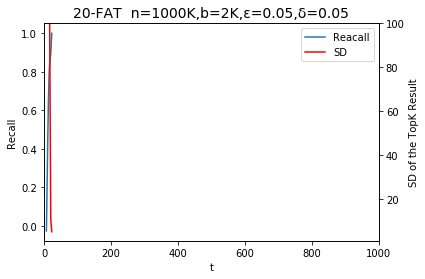

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x=[7,8,9,10,11,13,15,16,20,23]
y1 = [0,0.05,0.15,0.4,0.5,0.55,0.85,0.8,0.9,1]
y2=[955,599,358,328,258,149,130,91,29,0]

parameter1 = np.polyfit(x, y1, 4) # n=1为一次函数，返回函数参数
f1 = np.poly1d(parameter1) # 拼接方程
parameter2 = np.polyfit(x, y2, 4) # n=1为一次函数，返回函数参数
f2 = np.poly1d(parameter2) # 拼接方程
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Recall',fontproperties="SimSun")
ax1.set_xlabel('t')
ax1.set_title("20-FAT  n=1000K,b=2K,ε=0.05,δ=0.05", fontsize=14)
ax2 = ax1.twinx()  # this is the important function
ax2.set_ylabel("SD of the TopK Result")
ax1.plot(x, f1(x),label='Reacall')
ax2.plot(x, f2(x), 'r',label='SD')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.savefig('T2.png', bbox_inches='tight')
